In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pathlib import Path

CSHP = pd.read_csv('Case_Shiller.csv')
MUD = pd.read_csv('MORTGAGE30US.csv')

In [2]:
CSHP = Path("Data", "Case_Shiller.csv")
MUD = Path("Data", "MORTGAGE30US.csv")

In [12]:
print(CSHP.columns)


Index(['DATE', 'CSUSHPINSA'], dtype='object')


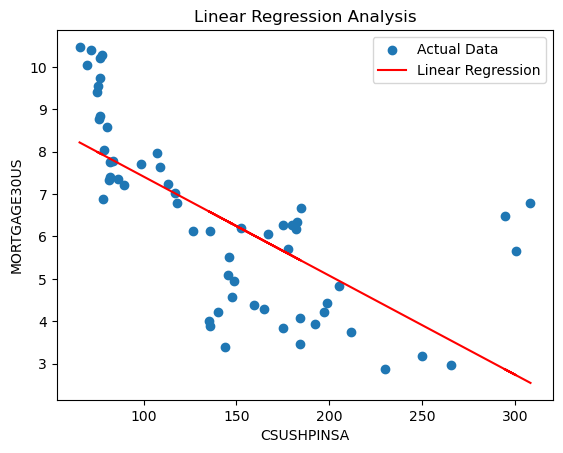

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pathlib import Path 


CSHP_path = Path("Case_Shiller.csv")
MUD_path = Path("MORTGAGE30US.csv")


if CSHP_path.exists() and MUD_path.exists():

    CSHP = pd.read_csv(CSHP_path)
    MUD = pd.read_csv(MUD_path)

    merged_df = pd.merge(CSHP, MUD, on='DATE')

    X = merged_df['CSUSHPINSA'].values.reshape(-1, 1)
    y = merged_df['MORTGAGE30US'].values

    model = LinearRegression()
    model.fit(X, y)

    predictions = model.predict(X)

    plt.scatter(X, y, label='Actual Data')
    plt.plot(X, predictions, color='red', label='Linear Regression')
    plt.xlabel('CSUSHPINSA')
    plt.ylabel('MORTGAGE30US')
    plt.title('Linear Regression Analysis')
    plt.legend()
    plt.show()
else:
    print("One or both of the files do not exist.")
